In [1]:
import ga_utils as g
import pandas as pd
import auth as auth
import matplotlib
import config as config
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
# launch auth process
auth.main()

In [3]:
pageviews = g.get_all_pages("94275425", start_date='2015-05-01', end_date='2016-05-20')


pages = g.get_all_pageviews("94275425", start_date='2015-05-01', end_date='2016-05-20')


sessions = g.get_sessions("94275425", start_date='2015-05-01', end_date='2016-05-20')

transactions = g.get_transactions_by_day("94275425", start_date='2015-05-01', end_date='2016-05-20')


In [29]:
df = pd.concat([pages.astype(int), transactions['ga:transactions'].astype(int), sessions['ga:sessions'].astype(int)], axis=1)

In [34]:
#pageviews['date'] = pd.to_datetime(pageviews['date'])
df.rename(columns=lambda x: x.replace('ga:', ''), inplace=True)
df = df[df.pageviews!=87293]
df = df[df.pageviews!=122848]
df = df[df.pageviews!=73522]
df.sort_values(by='pageviews', ascending=False)

,date,pageviews,transactions,sessions
143,20150921,51808,22,43080
308,20160304,46934,26,4145
309,20160305,45128,32,4396
310,20160306,40495,62,4343
316,20160312,37935,27,4465
156,20151004,36564,48,5426
144,20150922,34592,27,23314
317,20160313,32378,49,3942
323,20160319,31819,40,5109
315,20160311,30883,14,4320


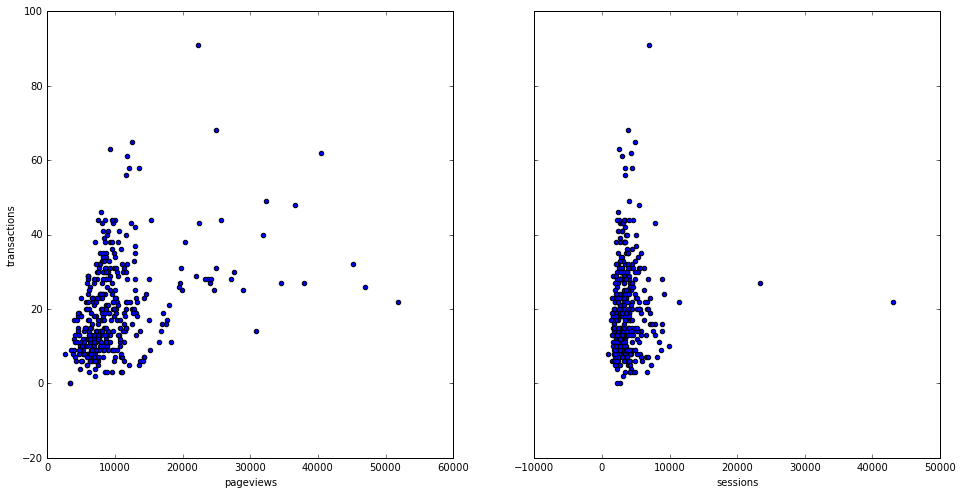

In [35]:
fig, axs = plt.subplots(1, 2, sharey=True)
df.plot(kind="scatter", x="pageviews", y='transactions', ax=axs[0], figsize=(16, 8))
df.plot(kind="scatter", x="sessions", y='transactions', ax=axs[1], figsize=(16, 8))

In [36]:
lm = smf.ols(formula='transactions ~ pageviews', data=df).fit()

In [37]:
lm.params

Intercept    12.782877
pageviews     0.000734
dtype: float64

In [38]:
lm.params[0] + lm.params[1]*50

12.819569426260056

In [39]:
X_new = pd.DataFrame({'pageviews':[df['pageviews'].min(), df['pageviews'].max()]})
X_new.head()

,pageviews
0,2640
1,51808


In [40]:
preds = lm.predict(X_new)
preds

array([ 14.7202616 ,  50.80259094])

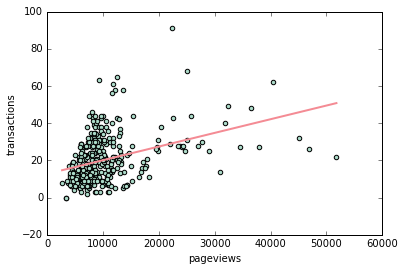

In [41]:
df.plot(kind="scatter", x="pageviews", y='transactions', color=g.colours['blue'])
plt.plot(X_new, preds,linewidth=2, color = g.colours['red'])

In [42]:
lm.conf_int()

,0,1
Intercept,10.618107,14.947646
pageviews,0.000553,0.000915


In [43]:
lm.pvalues

Intercept    6.882779e-27
pageviews    1.817306e-14
dtype: float64

In [44]:
lm.rsquared

0.14300401522255457

In [45]:
lm_multi = smf.ols(formula='transactions ~ sessions + pageviews', data=df).fit()

lm_multi.params

Intercept    14.100595
sessions     -0.000885
pageviews     0.000931
dtype: float64